In [ ]:
!pip3 install praw
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install nltk
!pip3 install gensim

In [8]:
import pandas as pd
import emoji
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str): return " "
    text = text.lower()
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [22]:
# Mining subreddits
import time
import praw
import pandas as pd
import json

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)

with open('./sub_keyword.json', 'r') as file:
    data = json.load(file)
iterations = data['iterations']

subs_df = pd.DataFrame(columns=['display_name', 'name',
                                'description', 'public_description',
                                'subscribers'])


for iteration in iterations:
    subs = []
    # subs += list(map(lambda x: x + 'bc', iteration['subreddits'].copy()))
    # subs += list(map(lambda x: x + 'ca', iteration['subreddits'].copy()))[:90]
    subs += list(map(lambda x: x + 'brithish', iteration['subreddits'].copy()))[7:]
    print(subs)
    for index, sub in enumerate(subs):
        print('sub: ', sub, '(', index + 1, '/', len(subs), ')' )
        for subreddit in reddit.subreddits.search_by_name(sub, exact=False, include_nsfw=False):
            print(subreddit.display_name)
            new_row = {
                'display_name': subreddit.display_name,
                'name': subreddit.name,
                'description': clean_text(subreddit.description),
                'public_description': clean_text(subreddit.public_description),
                'subscribers': subreddit.subscribers
            }
            subs_df.loc[len(subs_df)] = new_row
        print('len:', len(subs_df))
        subs_df.to_csv('./subs.csv', index=False)
        subs_df.head()


['argentabrithish', 'balfourbrithish', 'barrierebrithish', 'blue riverbrithish', 'boston barbrithish', 'burns lakebrithish', 'cache creekbrithish', 'canal flatsbrithish', 'cassiarbrithish', 'castlegarbrithish', 'cedarbrithish', 'chetwyndbrithish', 'chilanko forksbrithish', 'chilliwackbrithish', 'christina lakebrithish', 'clintonbrithish', 'cranbrookbrithish', 'crawford baybrithish', 'dawson creekbrithish', 'duncanbrithish', 'elkfordbrithish', 'endakobrithish', 'fauquierbrithish', 'ferniebrithish', 'fieldbrithish', 'fort nelsonbrithish', 'fort st. jamesbrithish', 'fort st. johnbrithish', 'fraser lakebrithish', 'gold bridgebrithish', 'goldenbrithish', 'grand forksbrithish', 'hancevillebrithish', 'hedleybrithish', 'highlandsbrithish', 'hillsbrithish', 'hopebrithish', 'horseflybrithish', 'invermerebrithish', 'kamloopsbrithish', 'kaslobrithish', 'kelownabrithish', 'keremeosbrithish', 'kimberleybrithish', 'liard riverbrithish', 'likelybrithish', 'lillooetbrithish', 'lower postbrithish', 'lum

In [29]:
subs_df = pd.read_csv('./subs.csv')
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_0.csv')], ignore_index=True)
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_1.csv')], ignore_index=True)
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_2.csv')], ignore_index=True)
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_3.csv')], ignore_index=True)
print(len(subs_df))

subs_df = subs_df.drop_duplicates(subset=['display_name'])
print(len(subs_df))
subs_df.head()

subs_df.to_csv('./subs_merged.csv', index=False)


174
642
863
907
1082
528


In [32]:
subs_df = pd.read_csv('./subs_merged copy.csv')

print(','.join(subs_df['display_name']))

0              FortStJohn
1              GrandForks
2                 ilovebc
3                  canada
4            canadatravel
             ...         
70            MackenzieBC
71              MissionBC
72                TrailBC
73    BeautifulVictoriaBC
74     VancouverCanadians
Name: display_name, Length: 75, dtype: object


In [17]:
# Mining data from Reddit
import time
import praw
import pandas as pd
import json

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)


params = {'sort': 'new', 'limit': None, 'time_filter': 'year'}

columns = ['author', 'author_flair_text', 'created_utc', 'distiguished', 'edited', 'id', 'is_original_content', 'is_self',
           'name', 'num_comments', 'over_18', 'permalink', 'score', 'selftext', 'subreddit', 'title', 'upvote_ratio', 'url']

df = pd.DataFrame(columns=columns)
with open('./sub_keyword.json', 'r') as file:
    data = json.load(file)
iterations = data['iterations']

for iteration in iterations:
    for subreddit in iteration['subreddits']:
        for keyword in iteration['keywords']:
            start_time = time.time()
            print('start_time: ' + str(start_time))
            print('\tsubreddit: ' + subreddit + ', keyword: ' + keyword)
            for submission in reddit.subreddit(subreddit).search(keyword, **params):
                new_row = {
                    'author': submission.author.name,
                    'author_flair_text': submission.author_flair_text,
                    'created_utc': int(submission.created_utc),
                    'distiguished': submission.distinguished,
                    'edited': submission.edited,
                    'id': submission.id,
                    'is_original_content': submission.is_original_content,
                    'is_self': submission.is_self,
                    'name': submission.name,
                    'num_comments': submission.num_comments,
                    'over_18': submission.over_18,
                    'permalink': submission.permalink,
                    'score': submission.score,
                    'selftext': submission.selftext,
                    'subreddit': submission.subreddit.display_name,
                    'title': submission.title,
                    'upvote_ratio': submission.upvote_ratio,
                    'url': submission.url
                }
                df.loc[len(df)] = new_row
            # time.sleep(max(0, 10 - time.time() + start_time))

df = df.drop_duplicates(subset='id', keep='first')

df.to_csv('./reddit.csv', index=False)
df.head()


start_time: 1695752163.73897
	subreddit: all, keyword: 100 mile house
start_time: 1695752168.0986056
	subreddit: all, keyword: alaska highway
start_time: 1695752173.4383564
	subreddit: all, keyword: alexis creek
start_time: 1695752175.567394
	subreddit: all, keyword: argenta
start_time: 1695752178.4063878
	subreddit: all, keyword: balfour
start_time: 1695752182.7843566
	subreddit: all, keyword: barriere
start_time: 1695752186.4404178
	subreddit: all, keyword: blue river
start_time: 1695752191.5062273
	subreddit: all, keyword: boston bar
start_time: 1695752195.170745
	subreddit: all, keyword: burns lake
start_time: 1695752199.4743056
	subreddit: all, keyword: cache creek
start_time: 1695752203.1167805
	subreddit: all, keyword: canal flats
start_time: 1695752207.8971162
	subreddit: all, keyword: cassiar
start_time: 1695752209.2721505
	subreddit: all, keyword: castlegar
start_time: 1695752210.2167466
	subreddit: all, keyword: cedar
start_time: 1695752214.1734684
	subreddit: all, keyword: 

,author,author_flair_text,created_utc,distiguished,edited,id,is_original_content,is_self,name,num_comments,over_18,permalink,score,selftext,subreddit,title,upvote_ratio,url
0,hyruleorbuzt,None,1695751606,None,False,16sv7k9,False,True,t3_16sv7k9,0,False,/r/finishing/comments/16sv7k9/refinishing_an_o...,1,New to refinishing here. I'm refinishing our f...,finishing,Refinishing an old door – how should I approac...,1.00,https://www.reddit.com/r/finishing/comments/16...
1,MistahZig,Mop Guy,1695751322,None,False,16sv2zi,False,True,t3_16sv2zi,1,False,/r/BORUpdates/comments/16sv2zi/go_to_bed_liz_m...,6,Originally posted in r/EntitledPeople\n\nMood ...,BORUpdates,"[Go to bed, Liz!] My own sister made false acc...",0.88,https://www.reddit.com/r/BORUpdates/comments/1...
2,spencewatson01,None,1695751282,None,False,16sv29g,False,True,t3_16sv29g,0,False,/r/Referrallinks/comments/16sv29g/american_exp...,1,# [https://americanexpress.com/en-us/referral/...,Referrallinks,American Express Delta Skymiles Referral Code,1.00,https://www.reddit.com/r/Referrallinks/comment...
3,Turbulent_Fix_1160,None,1695751181,None,False,16sv089,False,False,t3_16sv089,0,False,/r/u_Turbulent_Fix_1160/comments/16sv089/priva...,1,"PRIVATE Discord🔞(link in bio) porn, family swa...",u_Turbulent_Fix_1160,PRIVATE Discord🔞(link in bio),1.00,https://i.redd.it/78pjoyyv2nqb1.jpg
4,ManhattanMadMan,None,1695751178,None,False,16sv06e,False,True,t3_16sv06e,0,False,/r/Connecticut/comments/16sv06e/i_finally_swit...,2,I moved to the New Haven area about two years ...,Connecticut,I finally switched from Optimum to Frontier Fiber,1.00,https://www.reddit.com/r/Connecticut/comments/...


In [7]:
# Pre-processing data
input_file_name = "reddit.csv"
output_file_name = "reddit_clean.csv"

reddit_data = pd.read_csv(input_file_name)

selected_data = reddit_data.copy()
selected_data['title'] = selected_data['title'].apply(clean_text)
selected_data['selftext'] = selected_data['selftext'].apply(clean_text)
selected_data['permalink'] = 'https://www.reddit.com' + selected_data['permalink']

selected_data.to_csv(output_file_name, index=False)

In [92]:
# Filter Self-Post
input_file_name = "reddit_clean.csv"
reddit_data = pd.read_csv(input_file_name)
selected_data = reddit_data.copy()
print(selected_data.shape)
selected_data = selected_data[selected_data['is_self']]
print(selected_data.shape)

# Filter Discussion Post (num_comments > 0)
selected_data = selected_data[selected_data['num_comments'] > 0]
print(selected_data.shape)

# Filter Score and Upvote Ratio
selected_data = selected_data[selected_data['upvote_ratio'].notna()]
selected_data = selected_data[selected_data['score'] > 1]
selected_data['upvote_ratio'].describe()
print(selected_data.shape)

(17639, 18)
(9552, 18)
(6420, 18)
(4566, 18)


Mean: 47.72623740692072
Median: 9.0
Standard Deviation: 362.20159279496
Minimum: 1
Maximum: 14918


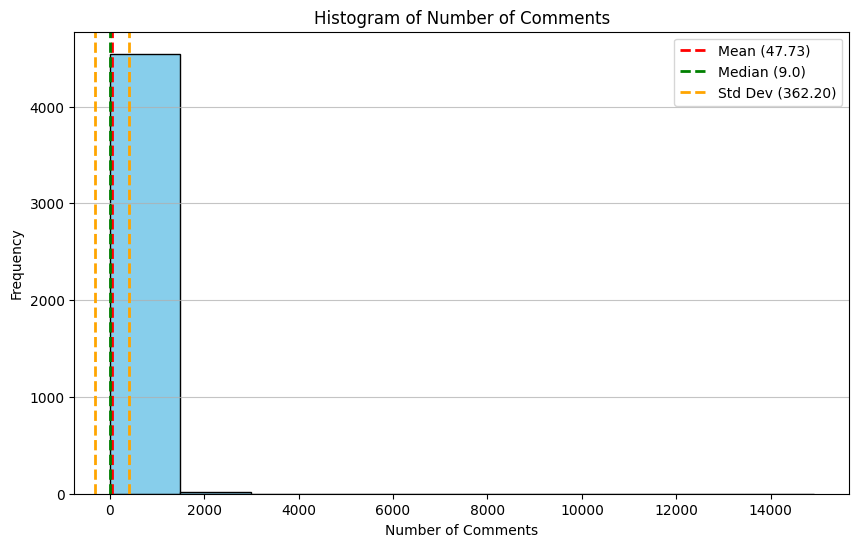

In [93]:
# Number of Comments analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mean_value = np.mean(selected_data['num_comments'])
median_value = np.median(selected_data['num_comments'])
std_deviation = np.std(selected_data['num_comments'])
min_value = np.min(selected_data['num_comments'])
max_value = np.max(selected_data['num_comments'])

print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum:", min_value)
print("Maximum:", max_value)

plt.figure(figsize=(10, 6))
plt.hist(selected_data['num_comments'], color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median ({median_value})')
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=2, label=f'Std Dev ({std_deviation:.2f})')
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Mean: 0.886263688129654
Median: 0.92
Standard Deviation: 0.11872134001337399
Minimum: 0.51
Maximum: 1.0


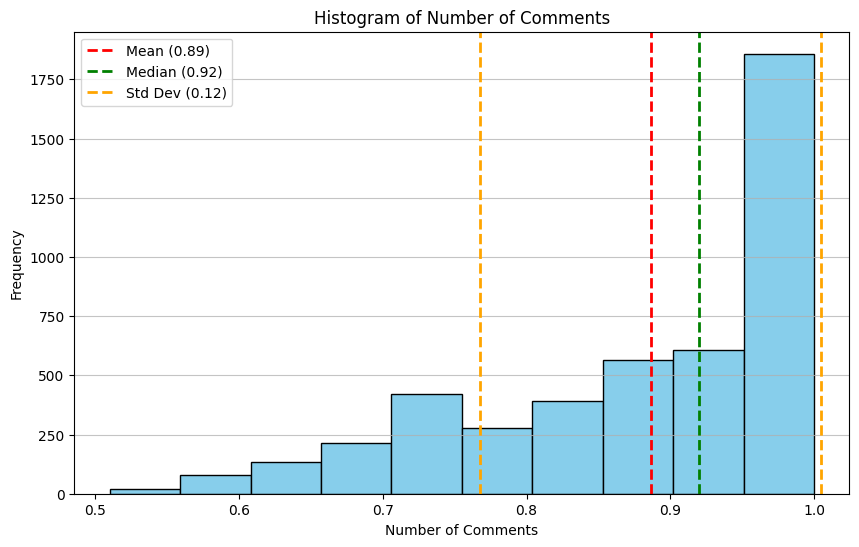

In [94]:
# Number of upvotes analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

attribute_name = 'upvote_ratio'

mean_value = np.mean(selected_data[attribute_name])
median_value = np.median(selected_data[attribute_name])
std_deviation = np.std(selected_data[attribute_name])
min_value = np.min(selected_data[attribute_name])
max_value = np.max(selected_data[attribute_name])

print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum:", min_value)
print("Maximum:", max_value)



plt.figure(figsize=(10, 6))
plt.hist(selected_data[attribute_name], color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median ({median_value})')
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=2, label=f'Std Dev ({std_deviation:.2f})')
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

In [96]:
selected_data.head()

,author,author_flair_text,created_utc,distiguished,edited,id,is_original_content,is_self,name,num_comments,over_18,permalink,score,selftext,subreddit,title,upvote_ratio,url
1,MistahZig,Mop Guy,1695751322,NaN,False,16sv2zi,False,True,t3_16sv2zi,1,False,https://www.reddit.com/r/BORUpdates/comments/1...,6,originally posted in r/entitledpeople mood spo...,BORUpdates,"[go to bed, liz!] my own sister made false acc...",0.88,https://www.reddit.com/r/BORUpdates/comments/1...
5,Tallglassofsex,NaN,1695751095,NaN,False,16suywy,False,True,t3_16suywy,1,False,https://www.reddit.com/r/LucidDreaming/comment...,2,recently i was telling a friend about a dream ...,LucidDreaming,i just found out the way i dream isn't normal....,0.75,https://www.reddit.com/r/LucidDreaming/comment...
7,nameless202003,NaN,1695751046,NaN,False,16suy6o,False,True,t3_16suy6o,5,False,https://www.reddit.com/r/TeslaModelY/comments/...,2,hi. i have question for tesla owners. i dont h...,TeslaModelY,planning to buy model y and no home charging a...,1.00,https://www.reddit.com/r/TeslaModelY/comments/...
11,DelightfullyClever,this is my circus these are my monkeys,1695750901,NaN,False,16suvzp,False,True,t3_16suvzp,2,False,https://www.reddit.com/r/traumatizeThemBack/co...,8,my mil doesn’t like me at all. she’s one of t...,traumatizeThemBack,"mil told my daughter that santa isn’t real, so...",1.00,https://www.reddit.com/r/traumatizeThemBack/co...
13,Zekhartha,NaN,1695750761,NaN,False,16sutr8,False,True,t3_16sutr8,3,False,https://www.reddit.com/r/AmericanHorrorStory/c...,5,i’m sure this question has been asked a hundre...,AmericanHorrorStory,tate langdon: why is he so loved by the fanbase?,1.00,https://www.reddit.com/r/AmericanHorrorStory/c...


In [7]:

df['created_utc_clean'] = df['created_utc'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df['created_utc_clean'].head()
df['created_utc_clean'].tail()

18673    2023-09-02 20:13:13
18674    2023-09-02 18:12:58
18675    2023-09-02 16:06:59
18676    2023-09-02 09:55:28
18677    2023-09-02 02:58:47
Name: created_utc_clean, dtype: object

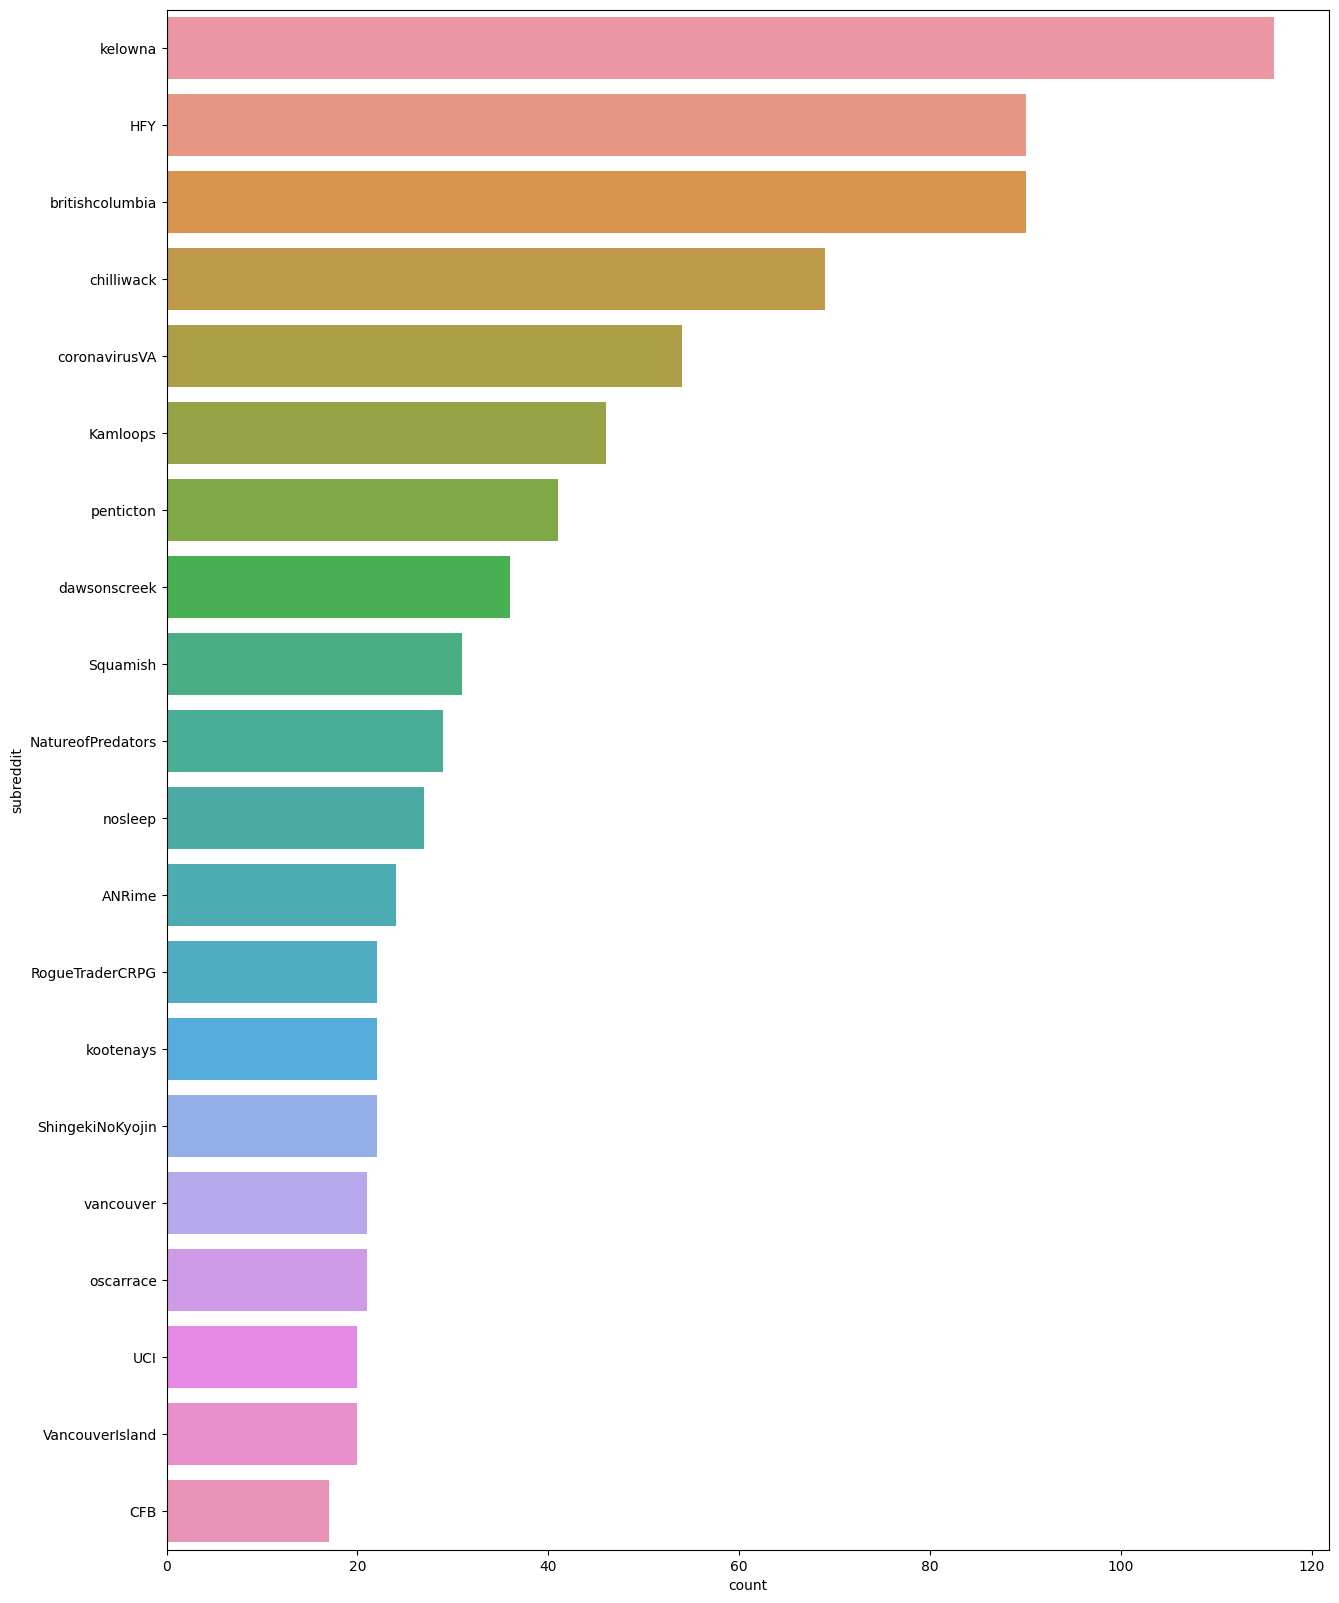

In [103]:
# create a fig with most frequent subreddits
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 20))
subreddit_count = selected_data['subreddit'].value_counts()
sns.countplot(y="subreddit", data=selected_data, order=subreddit_count.iloc[:20].index, ax=ax)
plt.show()

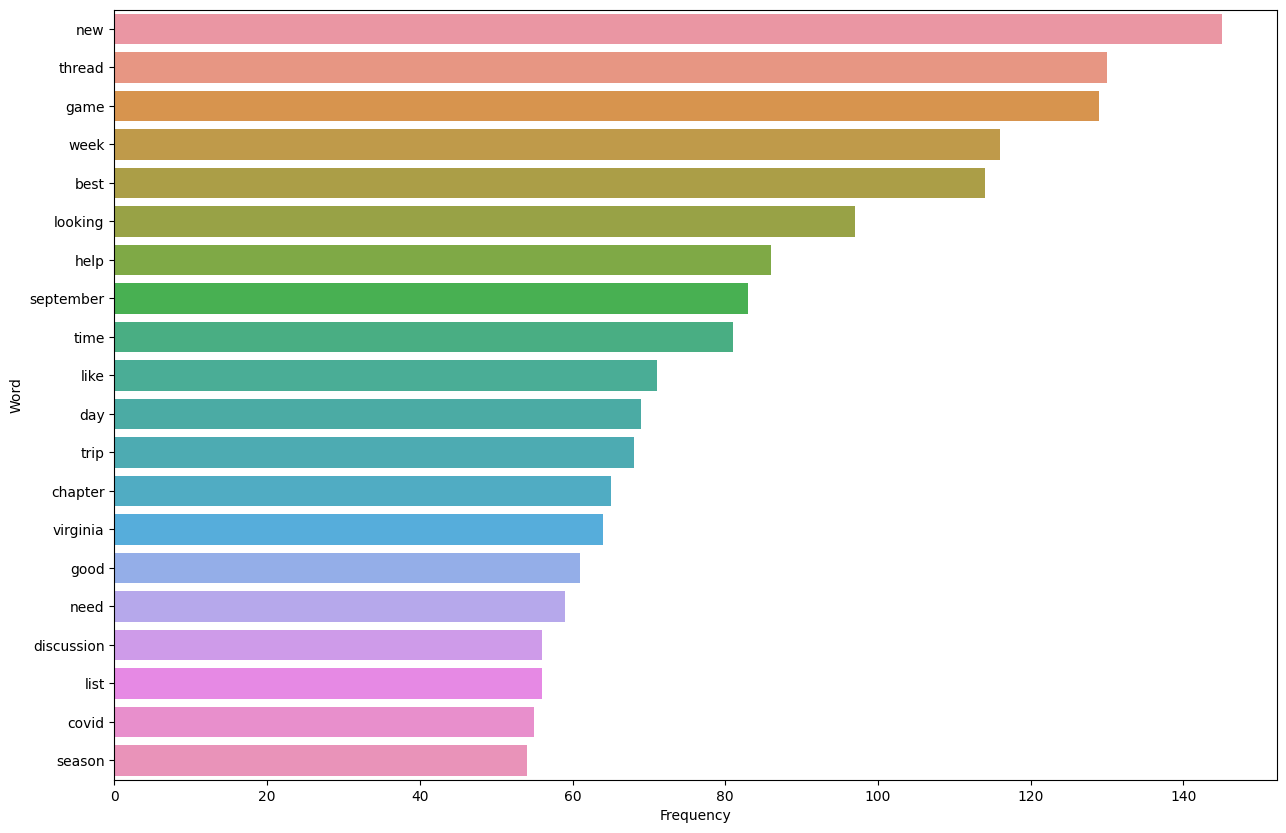

In [101]:
# create a fig with most keywords in titles
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS

fig, ax = plt.subplots(figsize=(15, 10))
all_titles = ' '.join(selected_data['title'].tolist())
all_titles = all_titles.lower()
words = [word for word in word_tokenize(all_titles) if
         len(word) > 2 and word not in STOPWORDS and word.isalpha()]
word_counts = Counter(words)
word_counts_df = pd.DataFrame(
    word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

sns.barplot(x="Frequency", y="Word", data=word_counts_df.iloc[:20], ax=ax)
plt.show()


1     2023-09-26
5     2023-09-26
7     2023-09-26
11    2023-09-26
13    2023-09-26
Name: created_utc, dtype: object
created_utc
2023-09-26    770
2023-09-25    393
2023-09-24    294
2023-09-23    175
2023-09-22    111
             ... 
2023-01-13      2
2023-01-20      2
2023-01-06      2
2023-02-09      2
2023-01-01      2
Name: count, Length: 238, dtype: int64


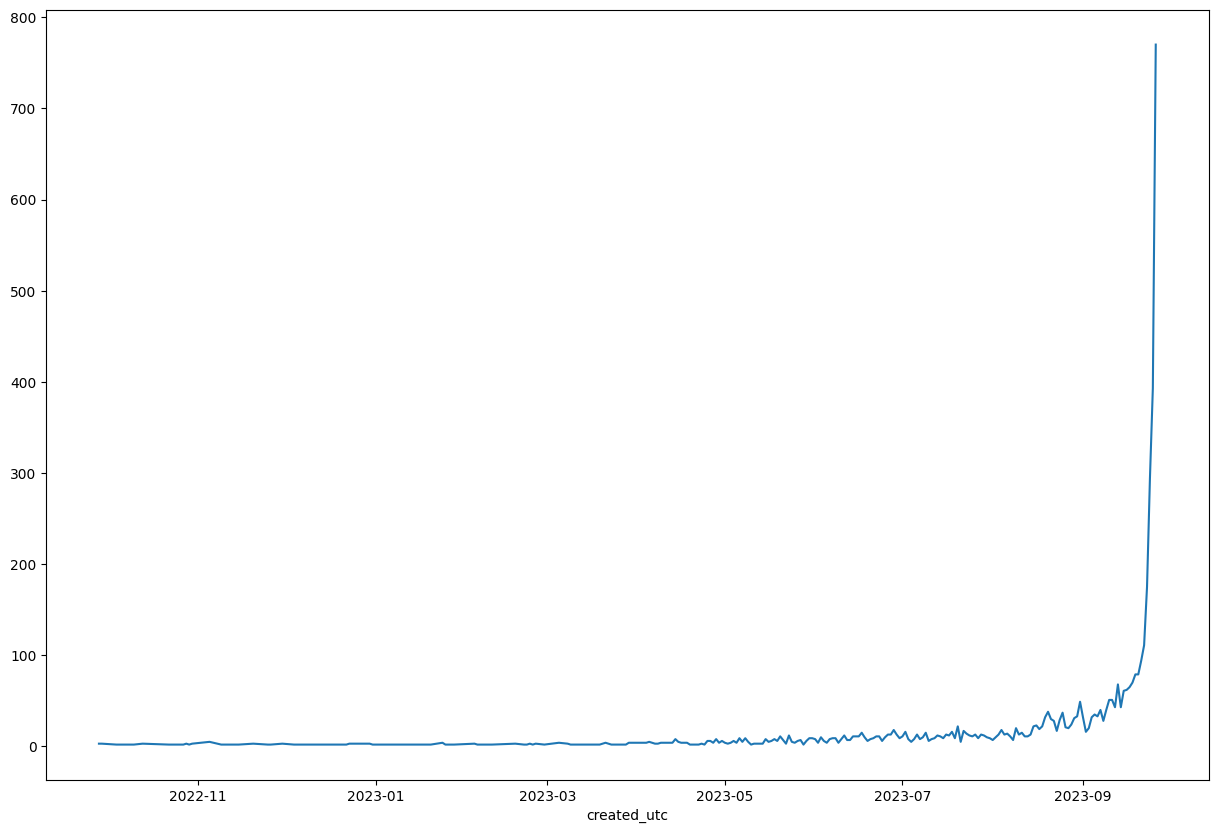

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

selected_data_copy = selected_data.copy()
selected_data_copy['created_utc'] = selected_data_copy['created_utc'].apply(lambda x: pd.to_datetime(x, unit='s'))

daily_counts = selected_data_copy['created_utc'].dt.date
print(daily_counts.head())
daily_counts = daily_counts.value_counts()
daily_counts = daily_counts[daily_counts > 1]
print(daily_counts)

fig, ax = plt.subplots(figsize=(15, 10))
daily_counts.plot(ax=ax)
plt.show()

In [104]:
selected_data.to_csv('reddit_filter.csv', index=False)